# Analisando  a declaração de bens dos candidatos e o perfil dos partidos nas eleições 2022: aplicações de clusterização com Kmeans e análises exploratórias

Objetivos:

1. Dar continuidade a avaliação de dados do TSE sobre as candidaturas nas eleições 2022. 

2. Aqui daremos seguimento ao projeto de analisar as candidaturas de 2022, que pode ser acessado [clicando aqui](https://drive.google.com/file/d/1CqQ4I3obNEGyut6La0mA7DtNDp0ExK4a/view?usp=sharing).

3. Neste relatório iremos unir os dados analisados no projeto anterior que versam sobre as informações pessoais dos candidatos (sexo, escolaridade, ocupação profissional e etc.) com os dados de bens declarados pelos pleiteantes.

4. O objetivo principal é avaliar a média de bens declarados por candidato agrupados por partidos e realizar um agrupamento, através de algotirmo de machine learning (kmeans), para identificar similiraridade entre as siglas com base na media de patrimônio de seus quadros.

Os dados originais podem ser obtidos diretamente do [portal de dados abertos do tse](https://dadosabertos.tse.jus.br/dataset/).

In [1]:
# Principais bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

Importado os dados: 

1. O primeiro dataset possui as informações específicas de uma candidatura: cargo, partido, sexo candidato, escolaridade, raça autodeclarada e etc.

2. Nosso segundo dataset possuem informações sobre patrimônio dos concorrentes: tipo de bem declarado, valor do bem e etc.

In [2]:
dados_candidatos = pd.read_csv('C:\\Users\\Adauto\\OneDrive\\Área de Trabalho\\Ciencia de Dados\\projetos python\\bens candidadtos 2022\\consulta_cand_2022_BRASIL.csv', encoding='latin-1', delimiter=';')
dados_bens = pd.read_csv('C:\\Users\\Adauto\\OneDrive\\Área de Trabalho\\Ciencia de Dados\\projetos python\\bens candidadtos 2022\\bem_candidato_2022_BRASIL.csv', encoding='latin-1', delimiter=';')

# Rotinas de tratamento dos dados

Verificando estrutura das colunas dos datasets:

In [3]:
dados_candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

In [4]:
dados_bens.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF',
       'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO', 'DT_ULTIMA_ATUALIZACAO', 'HH_ULTIMA_ATUALIZACAO'],
      dtype='object')

Realizando o Join das duas bases:

In [5]:
dados = pd.merge(dados_candidatos, dados_bens, left_on='SQ_CANDIDATO', right_on = 'SQ_CANDIDATO')

In [6]:
# Conferindo resultado do join
dados.columns

Index(['DT_GERACAO_x', 'HH_GERACAO_x', 'ANO_ELEICAO_x', 'CD_TIPO_ELEICAO_x',
       'NM_TIPO_ELEICAO_x', 'NR_TURNO', 'CD_ELEICAO_x', 'DS_ELEICAO_x',
       'DT_ELEICAO_x', 'TP_ABRANGENCIA', 'SG_UF_x', 'SG_UE_x', 'NM_UE_x',
       'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'NM_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRU

Para melhor organização, iremos selecionar apenas algumas colunas de interesse para os propósitos estabelecidos

In [7]:
# Criando filtro
colunas_selecionadas = ['DS_CARGO','NM_CANDIDATO','SG_PARTIDO','DT_NASCIMENTO','DS_GENERO','DS_GRAU_INSTRUCAO','DS_COR_RACA','VR_BEM_CANDIDATO','SG_UF_x','DS_OCUPACAO', 'SQ_CANDIDATO']

In [8]:
# Aplicando e conferino resultado
dados = dados[colunas_selecionadas]
dados.head()

,DS_CARGO,NM_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,VR_BEM_CANDIDATO,SG_UF_x,DS_OCUPACAO,SQ_CANDIDATO
0,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,"6000,00",MG,PUBLICITÁRIO,130001604374
1,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,"8000,00",MG,PUBLICITÁRIO,130001604374
2,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,"43323,36",MG,PUBLICITÁRIO,130001604374
3,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,"250000,00",MG,PUBLICITÁRIO,130001604374
4,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,"89867,19",MG,PUBLICITÁRIO,130001604374


Para evitar problemas posteriores, iremos substituir na coluna de valor declarado do bem (`VR_BEM_CANDIDATO`) o separador decimal "," por "."

In [9]:
dados['VR_BEM_CANDIDATO'] = dados['VR_BEM_CANDIDATO'].str.replace(',','.')
dados.head()

,DS_CARGO,NM_CANDIDATO,SG_PARTIDO,DT_NASCIMENTO,DS_GENERO,DS_GRAU_INSTRUCAO,DS_COR_RACA,VR_BEM_CANDIDATO,SG_UF_x,DS_OCUPACAO,SQ_CANDIDATO
0,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,6000.00,MG,PUBLICITÁRIO,130001604374
1,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,8000.00,MG,PUBLICITÁRIO,130001604374
2,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,43323.36,MG,PUBLICITÁRIO,130001604374
3,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,250000.00,MG,PUBLICITÁRIO,130001604374
4,DEPUTADO ESTADUAL,JEFERSON DOUGLAS SOARES ESTANISLAU,PSD,10/01/1984,MASCULINO,SUPERIOR COMPLETO,PARDA,89867.19,MG,PUBLICITÁRIO,130001604374


Assim como na análise do perfil das candidaturas e dos partidos anterior, iremos utilizar aqui a linguagem SQL para criar nosso dataframe de interesse

In [10]:
# Importando o modulo de SQL
import pandasql as ps

In [11]:
# Realizando a query que irá gerar o dataset
query = """ 

SELECT SG_PARTIDO,
       ROUND(SUM(VR_BEM_CANDIDATO),2) AS patrimonio_partido,
       AVG(VR_BEM_CANDIDATO) AS medio_patrimonio,
       MIN (VR_BEM_CANDIDATO) AS menor_patrimônio,
       MAX (VR_BEM_CANDIDATO) AS maior_patrimonio
       FROM dados
       GROUP BY SG_PARTIDO


"""

In [12]:
# Lendo o resultado da query
df = ps.sqldf(query, locals())
df

,SG_PARTIDO,patrimonio_partido,medio_patrimonio,menor_patrimônio,maior_patrimonio
0,AGIR,3.274004e+08,268801.624647,0.00,9999.75
1,AVANTE,6.576512e+08,252166.869314,0.00,9986.25
2,CIDADANIA,2.610146e+08,157143.072836,0.00,9999.50
3,DC,2.132742e+08,224263.086425,0.00,99000.00
4,MDB,2.507678e+09,390117.933545,0.00,99990.00
5,NOVO,7.364975e+08,255639.526116,0.00,99999.95
6,PATRIOTA,4.589520e+08,156372.045612,0.00,9999.98
7,PC do B,7.685620e+07,128522.074231,0.00,9950.40
8,PCB,9.574643e+06,62991.069737,0.00,95000.00
9,PCO,8.636527e+06,64936.290902,10000.00,93122.00


In [13]:
# Retirando notação científica da apresentação dos dados
pd.set_option('float_format', '{:.3f}'.format)

In [14]:
# Adicionando coluna de mediana ao dataframe final
df['mediana_partido'] = df.groupby('SG_PARTIDO')['patrimonio_partido'].transform('median')
df.head()

,SG_PARTIDO,patrimonio_partido,medio_patrimonio,menor_patrimônio,maior_patrimonio,mediana_partido
0,AGIR,327400378.820,268801.625,0.00,9999.75,327400378.820
1,AVANTE,657651195.170,252166.869,0.00,9986.25,657651195.170
2,CIDADANIA,261014643.980,157143.073,0.00,9999.50,261014643.980
3,DC,213274195.190,224263.086,0.00,99000.00,213274195.190
4,MDB,2507678076.830,390117.934,0.00,99990.00,2507678076.830


Esta tabela é similar a feita para análise do [perfil das candidaturas](https://drive.google.com/file/d/1CqQ4I3obNEGyut6La0mA7DtNDp0ExK4a/view?usp=sharing). Aqui apenas adicionamos as estatísticas descritivas em relação ao patrimônio agrupado por partido.

## Analisando graficamente

Agora podemos proceder para analisar as estatísticas descritivas de patrimônio por partido

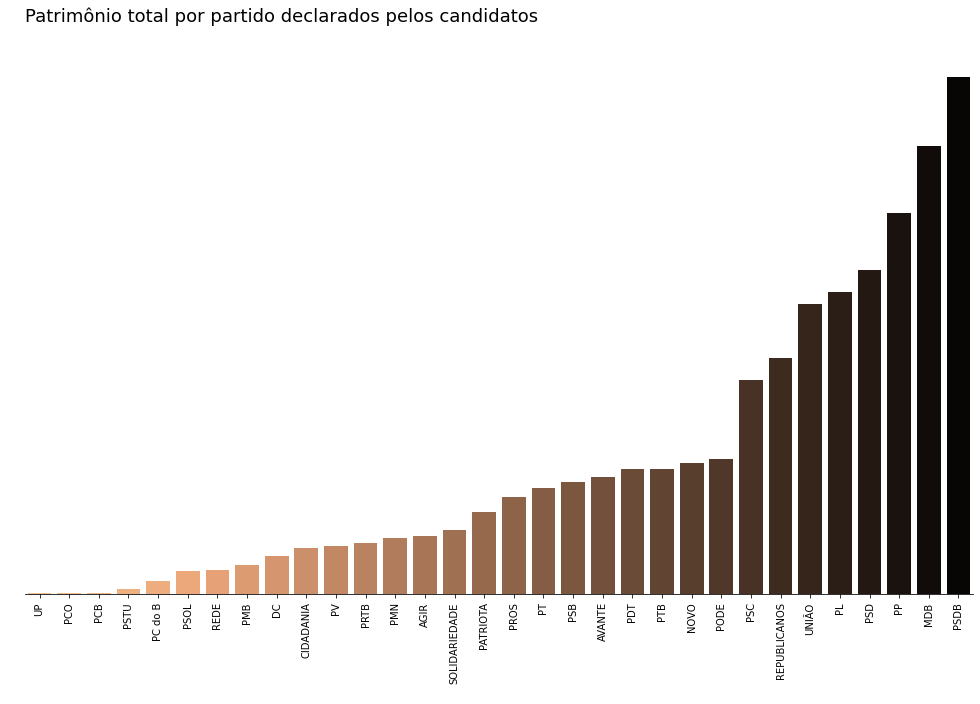

In [15]:
# Plotagem gráfica

# Ordenando os dados para melhor apresentação visual
df_ordenado = df.sort_values(by='patrimonio_partido')

g1_pat = sns.barplot(x= 'SG_PARTIDO', y = 'patrimonio_partido', data = df_ordenado, palette='copper_r')
g1_pat.figure.set_size_inches(17,10)
plt.title('Patrimônio total por partido declarados pelos candidatos', fontsize = 18, loc='left', pad = 30)
plt.ylabel(' ')
plt.xlabel(' ')
plt.yticks(())
plt.xticks(fontsize = 10, rotation = 90)
sns.despine (left = True)

Em relação a média por candidato, temos:

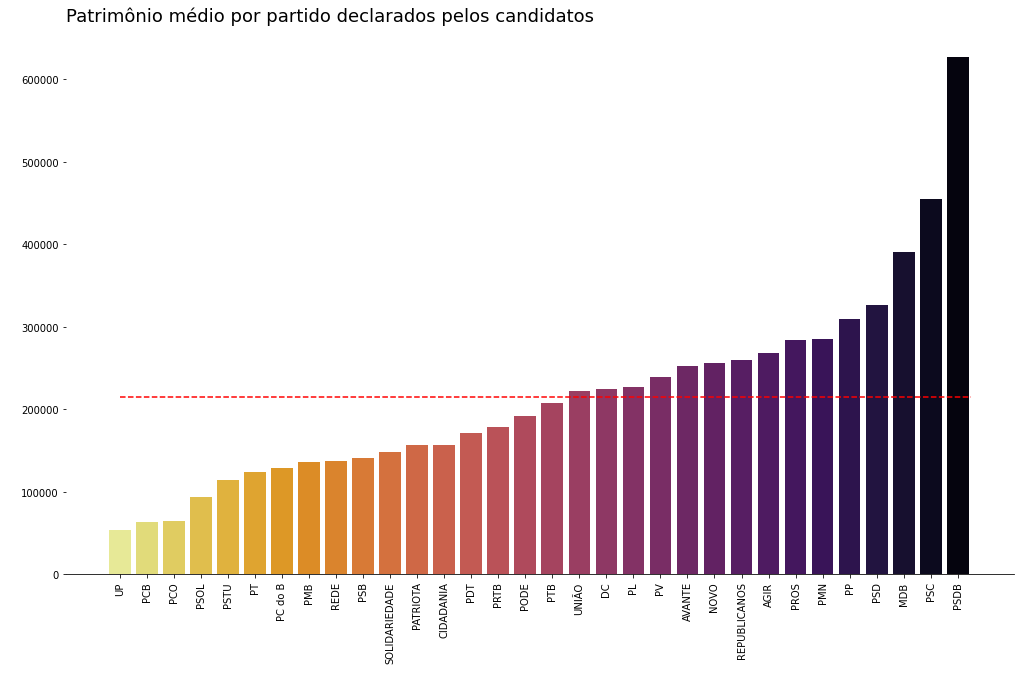

In [16]:
# Plotagem gráfica

#Ordernando dados
from cProfile import label


df_orndenado_avg = df.sort_values(by='medio_patrimonio')

g2_pat_avg = sns.barplot(x= 'SG_PARTIDO', y = 'medio_patrimonio', data = df_orndenado_avg, palette='inferno_r')
g2_pat_avg.figure.set_size_inches(17,10)
plt.title('Patrimônio médio por partido declarados pelos candidatos', fontsize = 18, loc='left', pad = 10)
plt.ylabel(' ')
plt.xlabel(' ')
plt.xticks(fontsize = 10, rotation = 90)
plt.hlines(df['medio_patrimonio'].mean(), 0, 31.5, colors='red', linestyles='--')
sns.despine (left = True)

Para isolar potencial efeito de outliers, plotamos a mediana de patrimônio por partido

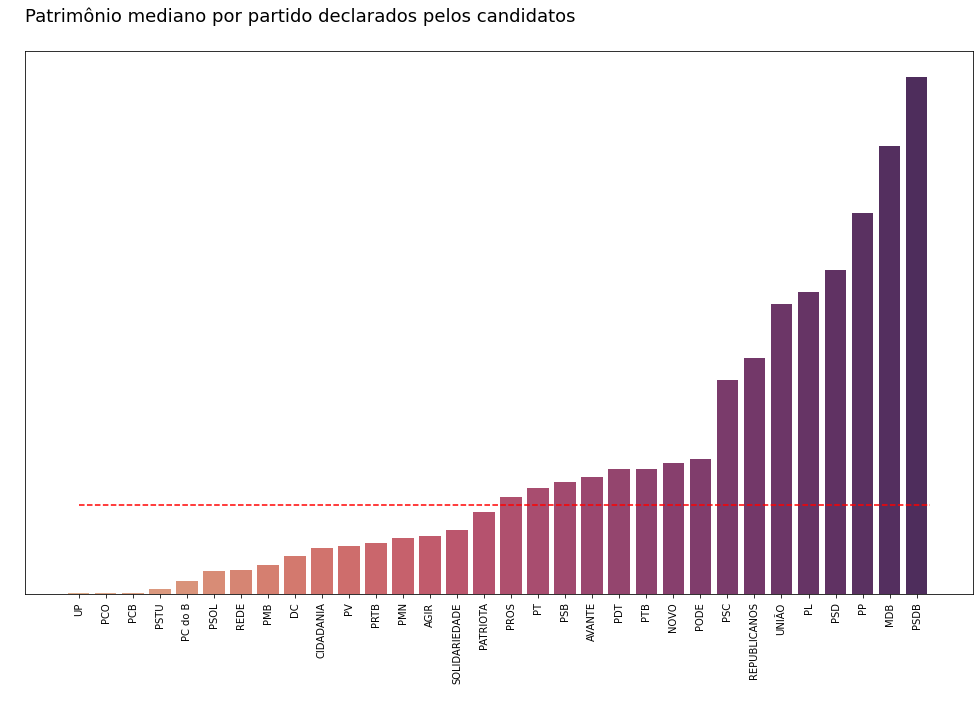

In [17]:
# Plotagem gráfica

#Ordernando dados
df_orndenado_mediana = df.sort_values(by='mediana_partido')

g1_pat_mediana = sns.barplot(x= 'SG_PARTIDO', y = 'mediana_partido', data = df_orndenado_mediana, palette='flare')
g1_pat_mediana.figure.set_size_inches(17,10)
plt.title('Patrimônio mediano por partido declarados pelos candidatos', fontsize = 18, loc='left', pad = 30)
plt.ylabel(' ')
plt.xlabel(' ')
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks([ ])
plt.hlines(df['mediana_partido'].median(),0,31.5,colors='red', linestyles='--', label='Mediana')

## Agrupamento com Kmeans

Quais partidos podem ser considerados similares quando olhamos para as médias e medianas de patrimônio delcarado pelos seus quadros?

In [18]:
# Criando modelo
modelo = cluster.KMeans(n_clusters=4)

In [19]:
# Definindo caracteristicas de agrupamento
caracteristicas = ['medio_patrimonio','mediana_partido', 'patrimonio_partido']

# Realizando o fitting

modelo.fit(df[caracteristicas])

# Inserido resultado no dataframe
df['cluster'] = modelo.labels_
df[['SG_PARTIDO', 'cluster']+caracteristicas]

,SG_PARTIDO,cluster,medio_patrimonio,mediana_partido,patrimonio_partido
0,AGIR,0,268801.625,327400378.820,327400378.820
1,AVANTE,2,252166.869,657651195.170,657651195.170
2,CIDADANIA,0,157143.073,261014643.980,261014643.980
3,DC,0,224263.086,213274195.190,213274195.190
4,MDB,1,390117.934,2507678076.830,2507678076.830
5,NOVO,2,255639.526,736497474.740,736497474.740
6,PATRIOTA,2,156372.046,458951953.870,458951953.870
7,PC do B,0,128522.074,76856200.390,76856200.390
8,PCB,0,62991.070,9574642.600,9574642.600
9,PCO,0,64936.291,8636526.690,8636526.690


Quantos partidos existem em cada cluster?

In [20]:
df.groupby(['cluster']).size()

cluster
0    15
1     3
2     9
3     5
dtype: int64

Qual a média de patrimonio para cada grupo de cluster?

O cluster 1 é o maior grupo, com 15 partidos enquanto que o cluster 3 apresenta menor quantidade de siglas com apenas 3

In [28]:
df.groupby(['cluster'])['medio_patrimonio'].mean().sort_values(ascending=False)

cluster
1   442006.659
3   298017.331
2   198114.320
0   152776.603
Name: medio_patrimonio, dtype: float64

O cluster 2 figura com a maior média de patrimônio quando comparado aos demais, enquanto que o cluster 0 apresenta menor média global.

Que partidos integram cada agrupamento detectado pelo algoritmo?

In [22]:
# Cluster 0

df[df['cluster'] == 0]

,SG_PARTIDO,patrimonio_partido,medio_patrimonio,menor_patrimônio,maior_patrimonio,mediana_partido,cluster
0,AGIR,327400378.820,268801.625,0.00,9999.75,327400378.820,0
2,CIDADANIA,261014643.980,157143.073,0.00,9999.50,261014643.980,0
3,DC,213274195.190,224263.086,0.00,99000.00,213274195.190,0
7,PC do B,76856200.390,128522.074,0.00,9950.40,76856200.390,0
8,PCB,9574642.600,62991.070,0.00,95000.00,9574642.600,0
9,PCO,8636526.690,64936.291,10000.00,93122.00,8636526.690,0
12,PMB,161958092.670,135643.294,0.00,994.02,161958092.670,0
13,PMN,315856435.080,285068.985,0.00,99000.00,315856435.080,0
17,PRTB,289163087.120,178605.983,0.00,99850.00,289163087.120,0
22,PSOL,132750179.520,93683.966,0.00,99544.00,132750179.520,0


No maior agrupamento possuímos em sua maioria partidos de esquerda e centro-esquerda no espectro ideológico e notadamente siglas de pequeno e médio porte (em relação a sua capilaridade eleitoral). Este cluster apresenta a menor média de patrimônio declarado ao TSE.

In [23]:
# Cluster 1

df[df['cluster'] == 1]

,SG_PARTIDO,patrimonio_partido,medio_patrimonio,menor_patrimônio,maior_patrimonio,mediana_partido,cluster
4,MDB,2507678076.830,390117.934,0.00,99990.00,2507678076.830,1
15,PP,2136742835.950,308822.494,0.00,99990.00,2136742835.950,1
21,PSDB,2897734593.830,627079.549,0.00,99900.00,2897734593.830,1


Em contraposição temos o cluster 1 com apenas 3 siglas. Entretanto, MDB, PP e PSDB são partidos considerados com grande capilaridade eleitoral e com alguma história política nacional. Este cluster apresenta a maior média de patrimônio entre todos os grupos.

In [24]:
# Cluster 2

df[df['cluster'] == 2]

,SG_PARTIDO,patrimonio_partido,medio_patrimonio,menor_patrimônio,maior_patrimonio,mediana_partido,cluster
1,AVANTE,657651195.170,252166.869,0.00,9986.25,657651195.170,2
5,NOVO,736497474.740,255639.526,0.00,99999.95,736497474.740,2
6,PATRIOTA,458951953.870,156372.046,0.00,9999.98,458951953.870,2
10,PDT,703095148.030,171027.766,0.00,997.34,703095148.030,2
14,PODE,759638216.260,191585.931,0.00,99995.55,759638216.260,2
16,PROS,544732070.880,283566.929,0.00,99800.00,544732070.880,2
18,PSB,627775528.970,140504.818,0.00,99935.64,627775528.970,2
24,PT,593432282.270,124123.046,0.00,9999.99,593432282.270,2
25,PTB,704013956.190,208041.949,0.00,9999.00,704013956.190,2


O grupo 3 é aquele com maior mescla de partidos no espectro ideológico: enquanto temos nomes conhecidos da esquerda como PT, PTB, PSB e PDT, também são a eles semalhantes partidos como NOVO, PATRIOTA. Apesar da diversidade ideológica entre eles, este agrupamento é similiar no quesito patrimônio declarado de seus quadros, possuindo a 3º maior média de patrimônio entre os grupos.

In [25]:
# Cluster 3

df[df['cluster'] == 3]

,SG_PARTIDO,patrimonio_partido,medio_patrimonio,menor_patrimônio,maior_patrimonio,mediana_partido,cluster
11,PL,1691190008.620,226761.868,0.00,99983.00,1691190008.620,3
19,PSC,1201709850.670,454848.543,0.00,99800.00,1201709850.670,3
20,PSD,1815240640.820,326540.860,0.00,9999.00,1815240640.820,3
28,REPUBLICANOS,1324097476.330,259474.324,0.00,9994.28,1324097476.330,3
30,UNIÃO,1624188214.950,222461.062,0.00,9990.00,1624188214.950,3


O cluter 3 possui 5 siglas em sua maioria com partidos de direta ou ecntro-direita, inclusive o PL do atual presidente Jair Bolsonaro (candidato a reeleição). Este cluster apresenta a 2º maior média de patrimônio declarado.

Este cluster chama a atenção de ter partidos já consolidados nas disputas eleitorais (inclusive a presidencial no caso do PT) com média de patrimônio apenas intermediária.

Para verificar possíveis outliers, iremos analisar este rankeamento pela `mediana`, após finalizarmos o cluster 3 adiante.

Agora iremos plotar um gráfico de dispersão para visualizarmos as similiradidades entre os grupos

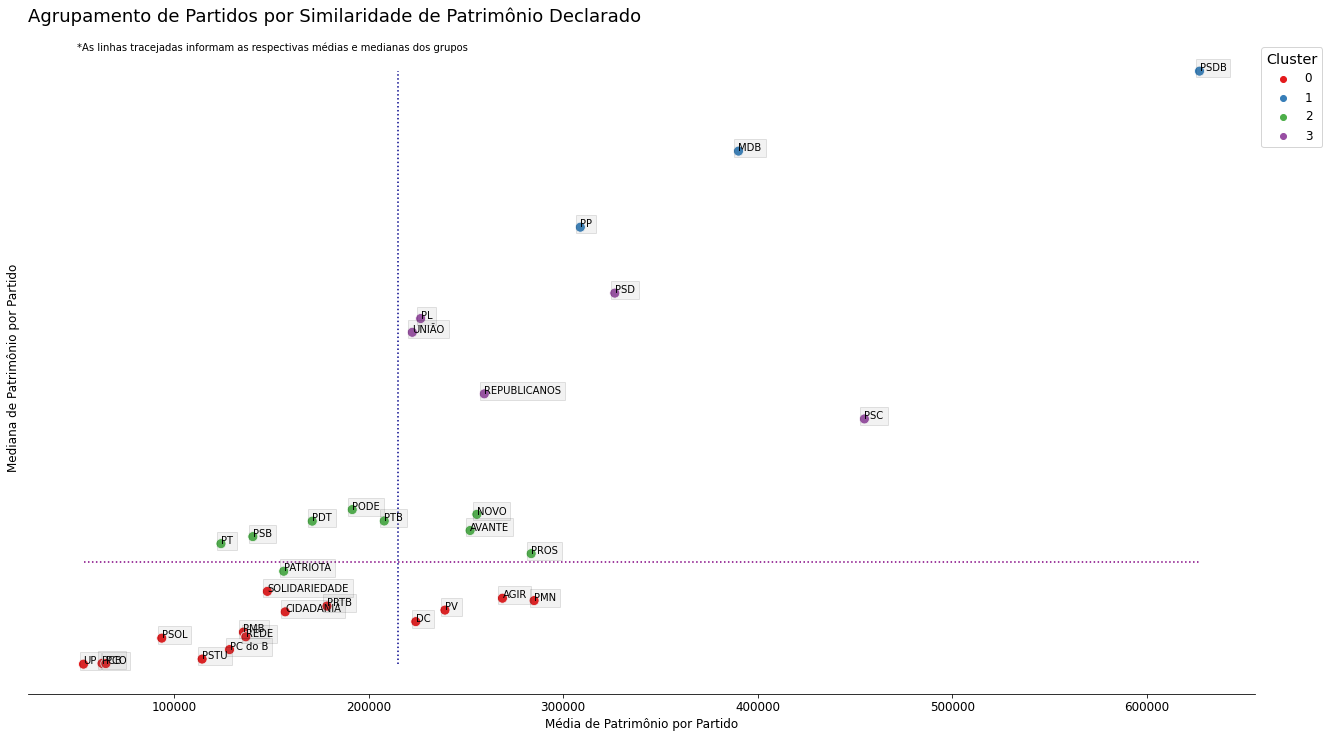

In [26]:
graf_cluster = sns.scatterplot(x='medio_patrimonio', y = 'mediana_partido', data = df, hue = 'cluster', palette='Set1', s = 100)
graf_cluster.figure.set_size_inches(22,12)
plt.title('Agrupamento de Partidos por Similaridade de Patrimônio Declarado', fontsize = 18, loc='left', pad =20)
plt.ylabel('Mediana de Patrimônio por Partido',fontsize = 12)
plt.xlabel('Média de Patrimônio por Partido',fontsize = 12)
# Criando linhas verticais e horizontais com base na média
plt.vlines(df['medio_patrimonio'].mean(),df['mediana_partido'].min(),df['mediana_partido'].max(), colors='darkblue', linestyles='dotted')
plt.hlines(df['mediana_partido'].median(),df['medio_patrimonio'].min(),df['medio_patrimonio'].max(),colors='purple', linestyles='dotted')
plt.yticks(())
plt.xticks(fontsize = 12)
plt.legend(bbox_to_anchor = (1, 1), loc =2, title="Cluster", fontsize = 'large', title_fontsize = 'x-large')
sns.despine (left = True)
plt.plot(markersize=30)
# Adicionando subtítulo
plt.text(x=50000, y=df['mediana_partido'].max()+100000000, s='*As linhas tracejadas informam as respectivas médias e medianas dos grupos', fontsize=10)
# Criando laço para adicionar labels nos pontos do gráfico
for i in range(df.shape[0]):
 plt.text(x=df.medio_patrimonio[i]+0.5,y=df.mediana_partido[i]+0.5,s=df.SG_PARTIDO[i], 
          fontdict=dict(color='black',size=10), bbox=dict(facecolor='grey',alpha=0.1))


## Impressões finais:

1. O cluster vermelho possui em média e mediana menor patrimônio declarado por seus candidatos. Em sua maioria são partidos de pequeno/médio porte eleitoral vinculados a esquerda e centro-esquerda (com algumas exceções);

2. Em oposição, o cluster azul figura com as maiores médias e medianas dentre os grupos identificados pelo algoritmo. Abriga apenas 3 legendas, mas são partidos de grande porte eleitoral e com históricos na política nacional.

3. O cluster roxo abriga as 2º maiores médias e medianas de patrimônio. Composto por partidos do atual governo e alinhados a ele.
 
4. Por fim, o cluster verde além de abrager nomes conhecidos da política nacional, é marcado principalmente por abrigar siglas à esquerda e direita do espcetro político. Este grupo está acima da mediana dos grupos, enquanto que sua média de patrimônio oscila mais entre as siglas.